# Get 2 the Core Singlebox identification

https://portal.unearthed.solutions/competitions/get-2-the-core

Core pics have up to 12 rows (may have two trays photographed together).

Pics have tray(s) as main feature, sign as second feature

In [106]:
#for debugging use:
#import pdb; pdb.set_trace()

In [107]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [108]:
import json, pdb
import shutil
from PIL import ImageDraw, ImageFont
from pathlib import PosixPath
from matplotlib import patches, patheffects
import matplotlib.cm as cmx
import matplotlib.colors as mcolors
from cycler import cycler
from os.path import join

from fastai.conv_learner import *
from fastai.dataset import *

In [109]:
torch.cuda.set_device(0)
torch.backends.cudnn.benchmark=True

In [110]:
PATH = Path('data')
IMG_PATH = PATH/'data/train/'

In [111]:
RESIZE_DIM = 224

In [112]:
CATEGORIES = {'Type_0':'straight', 'Type_1':'row_bent', 'Type_2':'img_distorted', 'Type_3':'row_bent_img_distorted', 'Type_4':'low_ar', 'Type_5':'low_ar_and_bent'}
cat_keys = CATEGORIES.keys()
cats = dict((i, o) for i,o in enumerate(cat_keys))
cats

{0: 'Type_0', 1: 'Type_1', 2: 'Type_2', 3: 'Type_3', 4: 'Type_4', 5: 'Type_5'}

In [113]:
RESIZE_DIM = 224

In [114]:
#todo need to fix, here manually changed dir 224 to train, couldnt get posix path to join, using string converted absolute path
RESIZED_TRAIN_STR = str(PATH.resolve())+f'/resized_{RESIZE_DIM}/train/'
RESIZED_TRAIN = PATH/f'resized_{RESIZE_DIM}/train/'
RESIZED_STR = str(PATH.resolve())+ f'/resized_{RESIZE_DIM}'
RESIZED_PATH = PATH/f'resized_{RESIZE_DIM}'
print(f'RESIZED_TRAIN: {RESIZED_TRAIN}')
print(f'RESIZED_PATH: {RESIZED_PATH}')

RESIZED_TRAIN: data/resized_224/train
RESIZED_PATH: data/resized_224


In [115]:
train = pd.read_csv(RESIZED_PATH/f'train_with_labels_scaled_{RESIZE_DIM}.csv')
# check the new columns
train.loc[0:10, 'scaled_5_X_1':'scaled_11_X_3']

,scaled_5_X_1,scaled_5_Y_1,scaled_5_X_2,scaled_5_Y_2,scaled_5_X_3,scaled_5_Y_3,scaled_5_X_4,scaled_5_Y_4,scaled_6_X_1,scaled_6_Y_1,...,scaled_10_Y_2,scaled_10_X_3,scaled_10_Y_3,scaled_10_X_4,scaled_10_Y_4,scaled_11_X_1,scaled_11_Y_1,scaled_11_X_2,scaled_11_Y_2,scaled_11_X_3
0,6.631579,91.368421,216.877193,93.885965,216.815789,77.307018,7.000000,75.342105,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,8.641975,81.839506,217.691358,82.962963,217.950617,67.925926,8.901235,65.851852,8.987654,65.679012,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
5,22.093750,56.437500,200.812500,56.875000,200.812500,43.531250,22.531250,43.312500,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
6,16.800000,60.375000,211.575000,57.225000,211.225000,42.350000,16.625000,46.025000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
7,11.375000,76.375000,217.000000,78.000000,217.250000,63.875000,11.625000,61.250000,11.500000,60.625000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [116]:
# check the new columns
train.loc[0:10, 'row_1_X_1':'row_4_X_3']

,row_1_X_1,row_1_Y_1,row_1_X_2,row_1_Y_2,row_1_X_3,row_1_Y_3,row_1_X_4,row_1_Y_4,row_2_X_1,row_2_Y_1,...,row_3_Y_2,row_3_X_3,row_3_Y_3,row_3_X_4,row_3_Y_4,row_4_X_1,row_4_Y_1,row_4_X_2,row_4_Y_2,row_4_X_3
0,100,2587,3527,2619,3530,2353,100,2327,100,2316,...,2072,3528,1803,105,1774,105,1764,3530,1796,3533
1,98,879,1529,894,1532,738,100,721,100,717,...,605,1540,455,107,428,0,0,0,0,0
2,100,868,1531,886,1535,735,105,715,105,711,...,600,1544,456,108,423,0,0,0,0,0
3,101,874,1531,891,1532,749,106,725,103,720,...,611,1543,454,111,423,0,0,0,0,0
4,103,1754,2492,1758,2502,1586,108,1582,109,1575,...,1397,2514,1219,95,1199,96,1196,2516,1214,2518
5,103,495,915,493,916,435,103,434,103,432,...,376,918,320,101,318,102,316,917,319,917
6,103,748,1213,735,1214,646,101,666,101,650,...,533,1212,441,100,467,97,448,1212,430,1210
7,104,1150,1721,1157,1726,1045,100,1034,101,1029,...,917,1735,788,96,774,98,768,1736,787,1739
8,104,881,1533,890,1536,751,111,722,111,716,...,611,1546,459,116,432,0,0,0,0,0
9,106,883,1533,893,1539,754,107,729,107,725,...,612,1542,460,113,435,0,0,0,0,0


In [117]:
#training file names
trn_ids = list(train.id)
trn_values = list(train.OutputID)
trn_fns=dict(zip(trn_ids, trn_values))

In [118]:
#note height and wight are post padding
def get_trn_anno(coord_prefix='scaled'):
    trn_anno_bbs = collections.defaultdict(lambda:[])
    trn_anno_coords = collections.defaultdict(lambda:[])
    trn_row = collections.defaultdict(lambda:[])
    trn_coords = collections.defaultdict(lambda:[])
    trn_anno = collections.defaultdict(lambda:[])
    for index, row in train.iterrows():
        if coord_prefix=='scaled':
            scalar = row['scalar']
            height = RESIZE_DIM
        else:
            height = int(row['height'])
        for n in range(1,12):
            #np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])
            #we swith the x (bb[0]) and y (bb[1]) coords as we want rows x columns ie rowsxcol for numpy
            
            #print(f'height: {height}')
            #temp=row[f'{coord_prefix}_{n}_Y_1']
            #print(f'Y1: {temp}')
            #check that there are bboxes for this row
            if row[f'row_{n}_Y_2'] != 0 and row[f'row_{n}_X_2'] !=0:
                y1_from_top = height-row[f'{coord_prefix}_{n}_Y_1']
                y2_from_top = height-row[f'{coord_prefix}_{n}_Y_2']
                y3_from_top = height-row[f'{coord_prefix}_{n}_Y_3']
                y4_from_top = height-row[f'{coord_prefix}_{n}_Y_4']
                #note we use 1,1 and 3,3 for the extremities
                bb = np.array([y1_from_top, row[f'{coord_prefix}_{n}_X_1'], y3_from_top, row[f'{coord_prefix}_{n}_X_3']])
                coords = np.array([y1_from_top, row[f'{coord_prefix}_{n}_X_1'], y2_from_top, row[f'{coord_prefix}_{n}_X_2'],
                                  y3_from_top, row[f'{coord_prefix}_{n}_X_3'], y4_from_top, row[f'{coord_prefix}_{n}_X_4']])
                trn_coords[row['id']].append((coords,row['Main_type']))
                trn_anno[row['id']].append((bb,row['Main_type']))
    return trn_coords, trn_anno

trn_coords, trn_anno = get_trn_anno()

In [119]:
MC_CSV = RESIZED_PATH/'tmp/mc.csv'

## Utils

In [120]:
def plot_row(training_path, row, coord_prefix='row'):
    """
    Function to plot rows ontop of image
    
    Inputs:
    filepath: A Path object containing the location of the training data. See example. 
    row: A row from the training dataframe

    """
    
    if isinstance (training_path, PosixPath):
        img = plt.imread(training_path/row.OutputID)
    else:
        img = plt.imread(training_path+row.OutputID)
    plt.figure()
    fig = plt.imshow(img)
    ax = fig.axes
    for r in range(1,12):
        patch = []
        for i in range(1,5):
            x = row[f'{coord_prefix}_{r}_X_{i}']
            y = img.shape[0] - row[f'{coord_prefix}_{r}_Y_{i}']
            temp = row[f'{coord_prefix}_{r}_Y_{i}']
            print(f'x: {x}, y: {y}, img.shape[0]: {img.shape[0]}, row coord: {temp}, img.shape[1]: {img.shape[1]}')
            patch.append([x,y])
        ax.add_patch(patches.Polygon(patch, closed=True, fill=False, linewidth=2,color='red'))

In [121]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.set_xticks(np.linspace(0, int(f'{RESIZE_DIM}'), 8))
    ax.set_yticks(np.linspace(0, int(f'{RESIZE_DIM}'), 8))
    ax.grid()
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    return ax

In [122]:
#conversion between numpy style and cs style
def bb_hw(a): 
    return np.array([a[1],a[0],a[3]-a[1],a[2]-a[0]])

In [123]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

In [124]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [125]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

In [126]:
def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)

In [127]:
def draw_idx(i):
    im_a = trn_anno[i]
    im = open_image(IMG_PATH/trn_fns[i])
    print(im.shape)
    draw_im(im, im_a)

## Largest Item Classifier

In [128]:
def get_lrg(b):
    if not b: 
        raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]

In [129]:
trn_lrg_anno = {a: get_lrg(b) for a,b in trn_anno.items()}

x: 5.157894736842105, y: 116.093567251462, img.shape[0]: 224, row coord: 107.906432748538, img.shape[1]: 224
x: 221.62573099415204, y: 118.83625730994152, img.shape[0]: 224, row coord: 105.16374269005848, img.shape[1]: 224
x: 221.25730994152042, y: 140.69590643274853, img.shape[0]: 224, row coord: 83.30409356725146, img.shape[1]: 224
x: 5.116959064327485, y: 138.40350877192986, img.shape[0]: 224, row coord: 85.59649122807015, img.shape[1]: 224
x: 4.912280701754384, y: 144.01169590643275, img.shape[0]: 224, row coord: 79.98830409356725, img.shape[1]: 224
x: 220.9298245614035, y: 146.3859649122807, img.shape[0]: 224, row coord: 77.6140350877193, img.shape[1]: 224
x: 221.01169590643275, y: 168.32748538011697, img.shape[0]: 224, row coord: 55.67251461988304, img.shape[1]: 224
x: 4.380116959064328, y: 165.66666666666669, img.shape[0]: 224, row coord: 58.33333333333333, img.shape[1]: 224
x: 4.298245614035086, y: 171.19298245614036, img.shape[0]: 224, row coord: 52.807017543859644, img.shape[

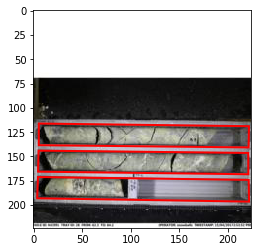

In [130]:
plot_row(RESIZED_TRAIN, train.iloc[23], coord_prefix='scaled')

In [131]:
trn_lrg_anno[23]

(array([171.19298,   4.29825, 196.53216, 221.7076 ]), 'Type_0')

In [132]:
b = bb_hw(b)
b

array([ 171.19298,    4.29825, -145.8538 ,  213.11111])

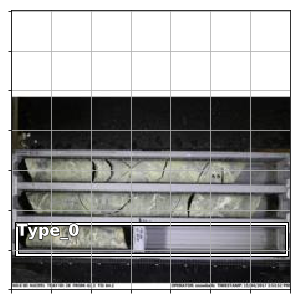

In [133]:
b,c = trn_lrg_anno[23]
b = bb_hw(b)
ax = show_img(open_image(RESIZED_TRAIN/trn_fns[23]), figsize=(5,10))
draw_rect(ax, b)
draw_text(ax, b[:2], c, sz=16)
plt.show()

In [134]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [135]:
print(PATH)


data


In [141]:
trn_lrg_anno[0][1]

'Type_0'

In [142]:
df = pd.DataFrame({'filename': [trn_fns[o] for o in trn_ids],
                  'category': [trn_lrg_anno[o][1] for o in trn_ids]}, columns = ['filename', 'category'])
df.to_csv(CSV, index=False)

In [143]:
df.head(n=2)

,filename,category
0,Image376_1TPP_4R_PL2.jpg,Type_0
1,Image208_1TPP_3R_MT.jpg,Type_0


In [144]:
f_model = resnet34
size = 224
bs = 64

In [146]:
transforms = tfms_from_model(f_model, sz=size, aug_tfms=transforms_side_on, crop_type = CropType.NO)
model_data = ImageClassifierData.from_csv(RESIZED_PATH, 'train', CSV, tfms=transforms)

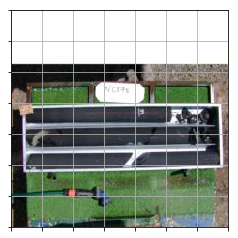

In [147]:
#grab a single batch, x is independent, y is dependent variable
x, y = next(iter(model_data.val_dl))
#need to convert x to numpy array

show_img(model_data.val_ds.denorm(to_np(x))[0])


In [148]:
learn = ConvLearner.pretrained(f_model, model_data, metrics=[accuracy])
#torch.optim has various optimization algos
learn.opt_fn = optim.Adam

In [149]:
learn.lr_find()

epoch      trn_loss   val_loss   accuracy   
    0      1.949479   128.300031 0.342857  



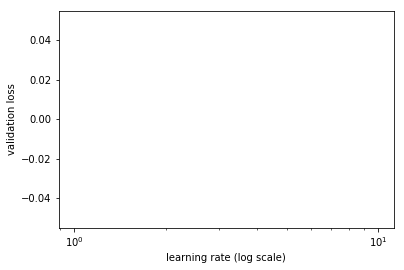

In [150]:
#looks weird if dont set n_skip_end as by default we remove first and last few points ie:
#plot(self, n_skip=10, n_skip_end=5)
learn.sched.plot(n_skip_end=2)

In [151]:
lr = 1e-1

In [152]:
learn.fit(lrs=lr, n_cycle=1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      2.057082   4.845775   0.571429  



[array([4.84577]), 0.5714285697255815]

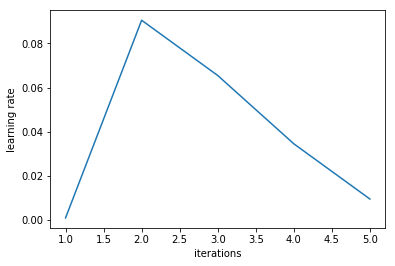

In [153]:
learn.sched.plot_lr()

In [154]:
x, y 
#print(f'{layer_groups}, {len(layer_groups)}')


(
 ( 0 , 0 ,.,.) = 
   2.2489  2.2489  2.2489  ...   2.2489  2.2489  2.2489
   2.2489  2.2489  2.2489  ...   2.2489  2.2489  2.2489
   2.2489  2.2489  2.2489  ...   2.2489  2.2489  2.2489
            ...             ⋱             ...          
   0.6906  0.5022 -0.6965  ...   0.3138  0.5536  0.7248
   0.6392  0.4166 -0.7822  ...   0.3652  0.3823  0.2282
   0.4679  0.2624 -0.9020  ...   0.8104  0.7077  0.3138
 
 ( 0 , 1 ,.,.) = 
   2.4286  2.4286  2.4286  ...   2.4286  2.4286  2.4286
   2.4286  2.4286  2.4286  ...   2.4286  2.4286  2.4286
   2.4286  2.4286  2.4286  ...   2.4286  2.4286  2.4286
            ...             ⋱             ...          
   0.4153  0.2577 -0.8978  ...   0.2227  0.4153  0.5553
   0.3277  0.1702 -0.9853  ...   0.2752  0.2227  0.0476
   0.1527  0.0126 -1.1253  ...   0.7304  0.5553  0.1352
 
 ( 0 , 2 ,.,.) = 
   2.6400  2.6400  2.6400  ...   2.6400  2.6400  2.6400
   2.6400  2.6400  2.6400  ...   2.6400  2.6400  2.6400
   2.6400  2.6400  2.6400  ...   2.6400  2.6

In [155]:
#final layer, set lr to 1e-1, ~50/50 split of lr for prev layers
lrs = np.array([lr/1000, lr/100, lr])

In [156]:
learn.freeze_to(-2)

In [157]:
lrf = learn.lr_find(lrs/1000)

epoch      trn_loss   val_loss   accuracy   
    0      1.665568   5333.096373 0.2       



In [158]:
#Was getting an error when LayerOptimizer checks that len(layer_groups) is = len(lrs)as have one layer group (TODO check if lr_find fixed this)
learn.fit(lrs=lrs/5, n_cycle=1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      1.965629   2.401997   0.628571  



[array([2.402]), 0.6285714268684387]

In [159]:
#In layer_optimizer we can (re)set the lrearning rates
#first we need to initialize the optimizer
#could do this: var_iter = next(iter(model_data.val_dl)) but we need Varibles not FloatTensors
#opt_adam = optim.Adam(params = VV(x), lr = lr)
#set_lrs(opt_adam, lrs=lrs)

In [160]:
learn.unfreeze()

In [161]:
learn.fit(lrs=lrs/5, n_cycle=1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      1.261328   2.115698   0.628571  



[array([2.1157]), 0.6285714268684387]

In [162]:
learn.save('clas_one')
learn.load('clas_one')

In [163]:
x, y = next(iter(model_data.val_dl))
x[0]


( 0 ,.,.) = 
  2.2489  2.2489  2.2489  ...   2.2489  2.2489  2.2489
  2.2489  2.2489  2.2489  ...   2.2489  2.2489  2.2489
  2.2489  2.2489  2.2489  ...   2.2489  2.2489  2.2489
           ...             ⋱             ...          
  0.6906  0.5022 -0.6965  ...   0.3138  0.5536  0.7248
  0.6392  0.4166 -0.7822  ...   0.3652  0.3823  0.2282
  0.4679  0.2624 -0.9020  ...   0.8104  0.7077  0.3138

( 1 ,.,.) = 
  2.4286  2.4286  2.4286  ...   2.4286  2.4286  2.4286
  2.4286  2.4286  2.4286  ...   2.4286  2.4286  2.4286
  2.4286  2.4286  2.4286  ...   2.4286  2.4286  2.4286
           ...             ⋱             ...          
  0.4153  0.2577 -0.8978  ...   0.2227  0.4153  0.5553
  0.3277  0.1702 -0.9853  ...   0.2752  0.2227  0.0476
  0.1527  0.0126 -1.1253  ...   0.7304  0.5553  0.1352

( 2 ,.,.) = 
  2.6400  2.6400  2.6400  ...   2.6400  2.6400  2.6400
  2.6400  2.6400  2.6400  ...   2.6400  2.6400  2.6400
  2.6400  2.6400  2.6400  ...   2.6400  2.6400  2.6400
           ...         

In [164]:
#model.eval() Sets the module in evaluation mode - batchnorm and dropout are disabled
#self.training is set to False
#predict batch converts x to Variable
batch_preds = predict_batch(learn.model, x)


In [165]:
batch_preds  #bs by classes tensor

Variable containing:
 -0.4404  -1.0335 -10.7776  -9.2435  -8.4419  -8.9551
 -4.9377  -0.0073  -9.6780 -15.9646 -11.8719 -14.6369
 -4.5928  -0.0110 -11.7072 -10.7489  -9.9508  -7.1698
 -0.0030 -10.1560 -11.6098 -18.5500  -5.8128 -17.4640
 -0.0001 -11.2925 -15.8993 -22.3919 -10.1131 -22.5229
 -0.0607  -3.3449  -6.8237 -10.5135  -9.6571  -3.7958
 -5.7639  -1.2602  -0.3383  -8.8835  -9.1974 -10.4615
 -0.0057  -6.2783  -6.4018 -10.0468  -6.1746 -14.0612
 -0.1667  -2.0317  -8.6887  -9.1731  -7.7758  -3.8276
 -5.7617  -0.0041  -6.9886 -12.8302 -12.7852 -12.1565
 -8.0779  -4.6436  -0.0101 -10.4784  -9.4238  -9.9172
 -1.9477  -0.1544  -8.9558  -8.9160 -11.5824  -8.7448
 -0.0014  -7.6462 -13.1959 -17.1089  -7.0469 -20.3657
 -3.2604  -0.1834 -10.0045 -10.3235  -9.7596  -2.0474
 -7.2344  -0.9160  -6.4485  -5.2957  -2.9798  -0.6129
 -0.0003  -8.3651 -12.9173 -16.4993  -9.3394 -20.6828
 -0.0083  -4.9235 -12.4942 -17.5994  -6.8969 -17.4468
 -0.0348  -3.4331 -12.0955 -16.3354  -6.2857 -16.4815
 -8.804

In [166]:
#compute along the class dimension, setting dim to -1 (as per lecture), None or 1 all prod same result
probs = F.softmax(batch_preds, -1)
probs

Variable containing:
 6.4379e-01  3.5575e-01  2.0862e-05  9.6739e-05  2.1564e-04  1.2908e-04
 7.1713e-03  9.9276e-01  6.2647e-05  1.1659e-07  6.9842e-06  4.3983e-07
 1.0124e-02  9.8903e-01  8.2346e-06  2.1470e-05  4.7688e-05  7.6945e-04
 9.9696e-01  3.8844e-05  9.0768e-06  8.7873e-09  2.9889e-03  2.6032e-08
 9.9995e-01  1.2466e-05  1.2446e-07  1.8851e-10  4.0546e-05  1.6537e-10
 9.4109e-01  3.5265e-02  1.0877e-03  2.7168e-05  6.3968e-05  2.2466e-02
 3.1389e-03  2.8359e-01  7.1300e-01  1.3866e-04  1.0130e-04  2.8617e-05
 9.9434e-01  1.8766e-03  1.6586e-03  4.3326e-05  2.0817e-03  7.8219e-07
 8.4644e-01  1.3111e-01  1.6847e-04  1.0379e-04  4.1978e-04  2.1763e-02
 3.1459e-03  9.9592e-01  9.2230e-04  2.6787e-06  2.8020e-06  5.2542e-06
 3.1033e-04  9.6228e-03  9.8991e-01  2.8136e-05  8.0779e-05  4.9318e-05
 1.4260e-01  8.5696e-01  1.2898e-04  1.3422e-04  9.3287e-06  1.5929e-04
 9.9865e-01  4.7788e-04  1.8582e-06  3.7128e-08  8.7008e-04  1.4299e-09
 3.8371e-02  8.3242e-01  4.5194e-05  3.2851

In [167]:
x = to_np(x)
preds = to_np(probs)


In [168]:
#get indices of max values (returns the indices of the maximum values along an axis.)
preds = np.argmax(preds, -1)

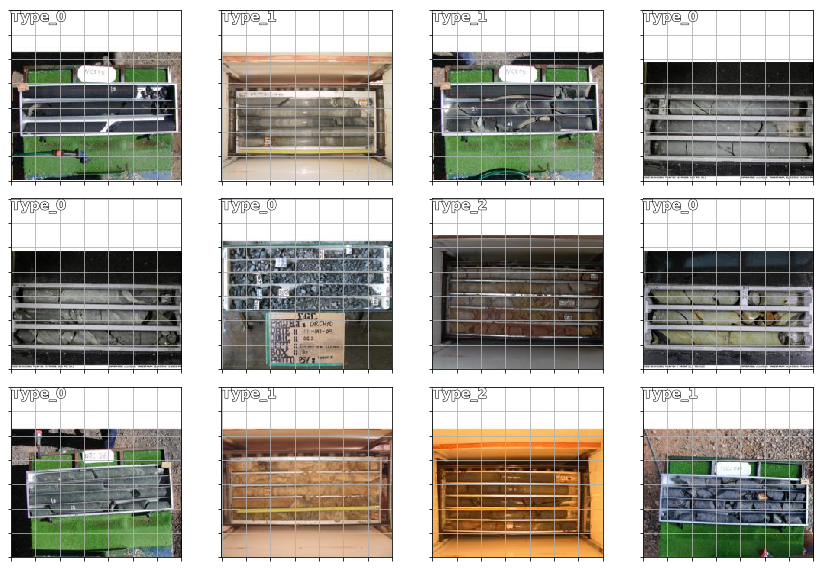

In [169]:
#draw the predictions
fig, axes = plt.subplots(3, 4, figsize = (12, 8))
for i,ax in enumerate(axes.flat):
    ima=model_data.val_ds.denorm(x)[i]
    b = model_data.classes[preds[i]]
    ax = show_img(ima, ax=ax)
    draw_text(ax, (0, 0), b)
plt.tight_layout()
plt.show()

In [170]:
#lecture 9 start reviews this part of lecture 8

### Bbox only

In [171]:

#create a model data object for bboxes
#create a model data object for classses
#combine these into one model

In [172]:
BB_CSV = PATH/'tmp/bb.csv'


In [173]:
bb = np.array([trn_lrg_anno[o][0] for o in trn_ids])
#want space sep data
bbs = [' '.join(str(p) for p in o) for o in bb]

df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids], 'bbox': bbs}, columns=['fn', 'bbox'])
df.to_csv(BB_CSV, index=False)

In [174]:
BB_CSV.open().readlines()[:5]

['fn,bbox\n',
 'Image376_1TPP_4R_PL2.jpg,81.78947368421052 6.140350877192982 96.46491228070177 216.7543859649123\n',
 'Image208_1TPP_3R_MT.jpg,100.93999999999998 13.72 120.68 214.48\n',
 'Image212_1TPP_3R_MT.jpg,102.48 14.000000000000002 121.1 214.90000000000003\n',
 'Image202_1TPP_3R_MT.jpg,101.64 14.14 119.14 214.48\n']

In [175]:
#define architecture
f_model = resnet34
sz = 224
bs = 64

In [176]:
#lighting is image-average*b + c
augs = [RandomFlip(), RandomRotate(20), RandomLighting(b=0.1, c=0.1)]
augs

In [178]:
tfms = tfms_from_model(f_model=f_model, sz=sz, aug_tfms=augs)
#classifiers are categorical, here doing regression
# if continuous=True then label_arr = np.array([np.array(csv_labels[i]).astype(np.float32) for i in fnames])
model_data = ImageClassifierData.from_csv(RESIZED_PATH, 'train', csv_fname=BB_CSV, bs=bs, tfms = tfms, continuous=True)

b [  3.92982 171.47954 216.8772   25.01169]
b [  3.92982 171.47954 216.8772   25.01169]
b [  3.92982 171.47954 216.8772   25.01169]
b [  3.92982 171.47954 216.8772   25.01169]
b [  3.92982 171.47954 216.8772   25.01169]
b [  3.92982 171.47954 216.8772   25.01169]
b [  3.92982 171.47954 216.8772   25.01169]
b [  3.92982 171.47954 216.8772   25.01169]
b [  3.92982 171.47954 216.8772   25.01169]


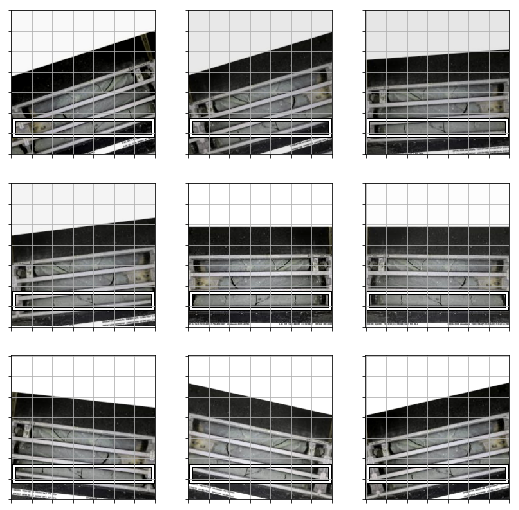

In [179]:
#draw images and bboxes - note problems with bbox locations - need to transform this in same way as indeprendant var
idx=3
fig, axes = plt.subplots(3, 3, figsize=(9,9))
for i, ax in enumerate(axes.flat):
    x,y = next(iter(model_data.aug_dl))
    ima = model_data.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(f'b {b}')
    show_img(ima, ax=ax)
    draw_rect(ax, b)

In [180]:
augs = [RandomFlip(tfm_y=TfmType.COORD),
        RandomRotate(30, tfm_y=TfmType.COORD),
        #I havent set tfm_y for lighting - I assume wont have any impact
        RandomLighting(0.1,0.1)]

In [182]:
#tfm_y: y axis specific transformations
tfms = tfms_from_model(f_model, sz, aug_tfms=augs, crop_type=CropType.NO, tfm_y=TfmType.COORD)
model_data = ImageClassifierData.from_csv(RESIZED_PATH, 'train', csv_fname=BB_CSV, bs=64, tfms=tfms)
model_data

IndexError: index 3 is out of bounds for axis 0 with size 3

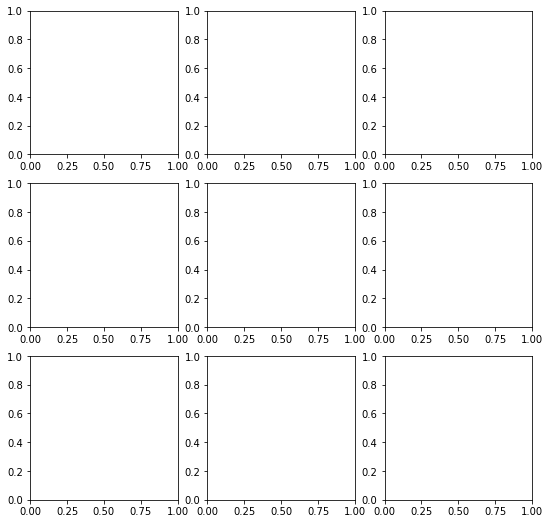

In [183]:

idx=3
fig, axes = plt.subplots(3, 3, figsize=(9,9))
for i, ax in enumerate(axes.flat):
    x,y = next(iter(model_data.aug_dl))
    ima = model_data.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    #TODO fix bug with b coordinates
    print(f'b {b}')
    show_img(ima, ax=ax)
    draw_rect(ax, b)

In [184]:
#now we create a model where we rotate 50% of the time 9 mins on video
tfm_y = TfmType.COORD
augs = [RandomFlip(tfm_y=tfm_y),
        #rotate up to 3% 50% of time
        RandomRotate(3, p=0.5, tfm_y=tfm_y),
        RandomLighting(0.05, 0.05, tfm_y=tfm_y)]

In [186]:
tfms = tfms_from_model(f_model, sz,aug_tfms=augs, crop_type=CropType.NO, tfm_y=tfm_y)
#path, folder, csv_fname, bs=64, tfms
model_data = ImageClassifierData.from_csv(RESIZED_PATH, 'train', BB_CSV, bs=bs, tfms=tfms, continuous=True)

In [187]:
#learn.summary()

#...
#Conv2d-119',
#BatchNorm2d-120',
#'ReLU-121',
#'BasicBlock-122',
#end of convolutional section - where head will be put

In [188]:
#create a custom head, 512*7*7 = 25088. 4 bounding box coords
#Dont want to add standard fully connected layers that make up a classifier, want a single linear with 4 outputs
#flattens out, this is a simple final layer. 25088=512x7x7
head_reg4 = nn.Sequential(Flatten(), nn.Linear(in_features=25088, out_features=4))
#custom head wont create any of the fully connected network, wont add the adaptive average pooling, instead will add the model you specify
#note that f_model is resnet34
#stick this on a pretrained model
learn = ConvLearner.pretrained(f_model, data = model_data, custom_head=head_reg4)
learn.opt_fn = optim.Adam
#L1 Loss function minimizes the absolute differences between the estimated values and the target values
learn.crit = nn.L1Loss()

In [189]:
learn.lr_find()

epoch      trn_loss   val_loss   
    0      245.311911 6452.632659



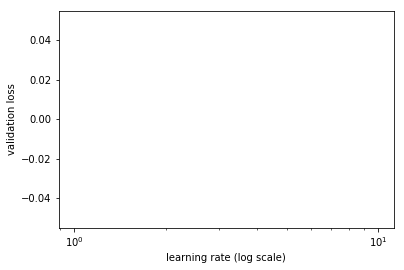

In [190]:
learn.sched.plot()

In [191]:
lr = 2e-3

In [192]:
learn.fit(lr, n_cycle=2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   
    0      101.322328 66.840963 
    1      72.642784  61.245005 
    2      67.826516  54.431014 



[array([54.43101])]

In [193]:
lrs = np.array([lr/100, lr/10, lr])
layer_groups = learn.get_layer_groups()

In [194]:
groups_freeze_to = layer_groups[-2:]
#groups_freeze_to


In [195]:
#why not just freeze last group?
learn.freeze_to(-2)

epoch      trn_loss   val_loss   
    0      103.681011 2.9950910458190886e+17



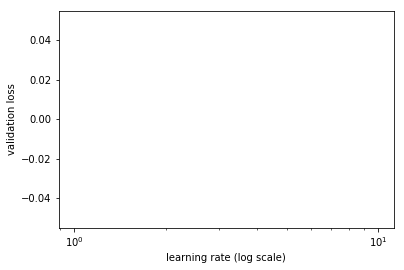

In [196]:
learn.lr_find(lrs/1000)
learn.sched.plot()

In [197]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   
    0      34.929052  34.610672 
    1      29.12515   27.132001 
    2      24.967691  25.353131 



[array([25.35313])]

In [198]:
learn.freeze_to(-3)

In [199]:
learn.fit(lrs, 1, cycle_len=2)

epoch      trn_loss   val_loss   
    0      20.279705  22.59883  
    1      17.768175  20.049927 



[array([20.04993])]

In [200]:
learn.save('reg4')
learn.load('reg4')

In [201]:
x, y = next(iter(model_data.val_dl))
learn.model.eval()
preds = to_np(learn.model(VV(x)))

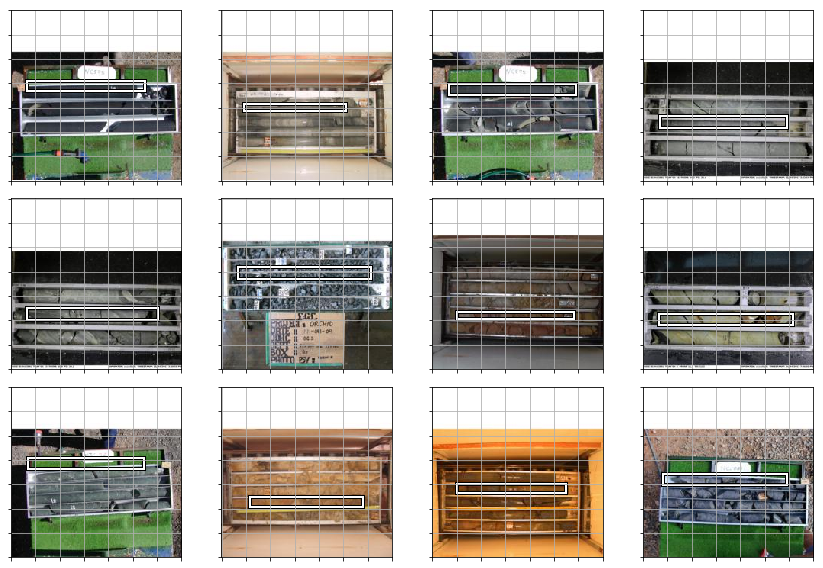

In [202]:
fig, axes = plt.subplots(3,4, figsize=(12,8))
for i, ax in enumerate(axes.flat):
    ima = model_data.val_ds.denorm(to_np(x))[i]
    b = bb_hw(preds[i])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
plt.tight_layout()


## Single object detection


In [203]:
#bounding box and largest object
f_model = resnet34
sz = 224
bs = 64


In [204]:
#Workflow:

#create two models
#md as bbox coords
#md2 as classes
#then merge as a new dataset class

In [205]:
#note here we are passing in to the ModelData val_idx
#trn_fns = dict((o[ID], o[FILE_NAME]) for o in trn_j[IMAGES])
#get indexes for a validations set (80/20 default split); index of images to be used for validation
val_idxs = get_cv_idxs(len(trn_fns))

In [207]:
tfms = tfms_from_model(f_model,sz=sz, aug_tfms=augs, crop_type=CropType.NO, tfm_y=TfmType.COORD)
#BB_CSV contains only filename, bbox coords
md = ImageClassifierData.from_csv(RESIZED_PATH, 'train', BB_CSV, bs=bs, tfms=tfms, continuous=True, val_idxs=val_idxs)
print(f'{type(md)}, size: {md.sz}')

<class 'fastai.dataset.ImageClassifierData'>, size: 224


In [209]:
tfms2 = tfms_from_model(f_model, sz=sz, aug_tfms=transforms_side_on, crop_type=CropType.NO)
#note we are reading in the CSV not BB_CSV, CSV contains only filename, category
md2 = ImageClassifierData.from_csv(RESIZED_PATH, 'train', CSV, bs=bs, tfms=tfms2)
md2.sz

224

In [210]:
#ImageClassifierData <-ImageData (has own proerties eg sz which returns self.trn_ds.sz) <-ModelData (has own properties eg trn_ds which returns self.trn_dl.dataset)
#but ConcatLblDataset has none of these properties as extends pytorch Dataset directly

In [211]:
class ConcatLblDataset(Dataset):
    #take existing ds which has existing independent and dependant vars, add in dependent y2
    #extends torch Dataset, which requires one to override the methods below
    #sz property added as is required by learner (lean.summary())
    def __init__(self, ds, ds2):
        #I changed this to use seconds dataset rater than just y to help me understand this
        self.ds = ds
        self.ds2 = ds2
        
    def __len__(self):
        assert len(self.ds) == len(self.ds2)
        return len(self.ds)

    def __getitem__(self, i):
        x, y = self.ds[i]
        x2, y2 = self.ds2[i]
        #these should contain exactly the same info, so we only need to keep one. However this test fails
        #assert np.array_equal(x,x2)
        return (x, (y, y2))
    
    @property
    def sz(self):
        x, y = self.ds[0]
        print(f'sz: {x.shape[1]}')
        return x.shape[1]

In [212]:
#the bbox tagets
md.trn_ds.y

array([[ 81.78947,   6.14035,  96.46491, 216.75438],
       [100.94   ,  13.72   , 120.68   , 214.48   ],
       [102.48   ,  14.     , 121.1    , 214.9    ],
       ...,
       [116.41147,  17.30325, 135.08528, 212.0933 ],
       [161.07263,  42.36871, 170.54749, 189.49721],
       [199.34091,  42.23864, 216.60228, 203.07954]], dtype=float32)

In [213]:
#classification dependent variable
md2.trn_ds.y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [214]:
#NB I changed the ConcatLblDataset. now it takes two datasets
trn_ds2 = ConcatLblDataset(md.trn_ds, md2.trn_ds)
val_ds2 = ConcatLblDataset(md.val_ds, md2.val_ds)

In [215]:
val_ds2[0][1]

(array([101.,  14., 117., 212.], dtype=float32), 0)

In [216]:
md.trn_dl.dataset = trn_ds2
md.val_dl.dataset = val_ds2
print(f'{type(md)}')
#Note that now in ImageData self.trn_ds.sz is no longer a valid property

<class 'fastai.dataset.ImageClassifierData'>


In [217]:
x, y = next(iter(md.val_dl))
idx=3
ima = md.val_ds.ds.denorm(to_np(x))[idx]
b = bb_hw(to_np(y[0][idx])); b

array([  3., 171., 215.,  23.], dtype=float32)

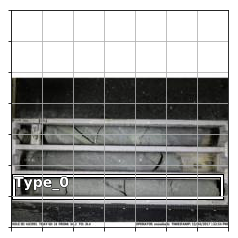

In [218]:
ax = show_img(ima)
draw_rect(ax,b)
draw_text(ax, b[:2], md2.classes[y[1][idx]])
plt.show()

In [219]:
#replace head, similar to before but add an extra linear layer and add dropout
head_reg4 = nn.Sequential(
    Flatten(), 
    nn.ReLU(),
    nn.Dropout(0.5),
    #this is a helper linear layer
    nn.Linear(in_features=512*7*7, out_features=256),
    nn.ReLU(),
    #1d as we have flattened 
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    #note at this stage we only have 256 in_features
    nn.Linear(in_features=256, out_features= 4+len(cats))
)


In [220]:
#ConvnetBuilder(f, c, is_multi, is_reg, ps=None, xtra_fc=None, xtra_cut=0, custom_head=None)
#why is c (final layer size) zero, shouldn't it be 4+len(cats)?
model_arch = ConvnetBuilder(f=f_model, c=0, is_multi=False, is_reg=False, custom_head=head_reg4)

In [221]:
learn = ConvLearner(data = md, models = model_arch)

In [222]:
learn.opt_fn = optim.Adam

In [223]:
#loss fn needs to look at 4+C activations & decide if good
#for 4 coords - L1 loss which is like MSE but sums abs vals
#for C use cross-entropy loss
def detn_loss(input, target):
    bb_t, c_t = target
    #first dim is batch dim, input first 4, and 4 onwards elements
    bb_i, c_i = input[:, :4], input[:, 4:]
    #for bb_i we know they will be b/w 0 & 224
    #use sigmoid to force b/w 0&1 and force the range
    bb_i = F.sigmoid(bb_i)*224
    #scalar for classifications based on what works
    combined_loss = F.l1_loss(bb_i, bb_t) + F.cross_entropy(c_i, c_t)*20
    return combined_loss
    
def detn_l1(input, target):
    bb_t, _ = target
    bb_i = input[:, :4]
    bb_i = F.sigmoid(bb_i)*224
    f1_loss = F.l1_loss(V(bb_i), V(bb_t)).data
    return f1_loss

def detn_acc(input, target):
    _,c_t = target
    c_i = input[:,4:]
    return accuracy(c_i, c_t)

learn.crit = detn_loss
learn.metrics = [detn_acc, detn_l1]
    

In [224]:
learn.lr_find()
learn.sched.plot()

AttributeError: 'list' object has no attribute 'data'

In [ ]:
lr=2e-2
#use_clr sets shed to use CircularLR
learn.fit(lrs=lr, n_cycle=1, cycle_len=3, use_clr=(32,5))

In [ ]:
learn.save('reg1_0')

In [225]:
#as we replaced the dataset with a ConcatLblData, we no longer have access to .sz property and learn.summary() throws an error, sz prperty added to ConcatLblData above

In [226]:
#learn.summary()

In [227]:
layer_groups = learn.get_layer_groups()
print(f'{layer_groups}, {len(layer_groups)}')

[[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False), BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True), ReLU(inplace), MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False), Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (relu): ReLU(inplace)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (relu): ReLU(inplace)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  )
  (2): BasicBlock(
 

In [228]:
#set to trainable the last two layer groups only 
learn.freeze_to(-2) 

In [229]:
#learn.sched.plot() cant run as CircularLR has no attribute plot

In [230]:
#learn.sched.plt_lr() ditto

In [231]:
lrs = np.array([lr/100, lr/10, lr])

In [232]:
learn.lr_find(lrs/1000)
learn.sched.plot(0)

AttributeError: 'list' object has no attribute 'data'

In [ ]:
learn.fit(lrs/5, n_cycle=1, cycle_len=5, use_clr=(32,10))

In [ ]:
learn.save('reg1_1')

In [ ]:
learn.load('reg1_1')

In [233]:
learn.unfreeze()

In [234]:
#to plot need to access lrs (ie from declr. above) and losses (tricky, need to work this out), cant plot below as 'CircularLR' object has no attribute 'plot'

In [235]:
#learn.sched.plot()

In [236]:
learn.fit(lrs=lrs/10, n_cycle=1, cycle_len=10, use_clr=(32, 10))

AttributeError: 'list' object has no attribute 'data'

In [ ]:
learn.save('reg1')

In [ ]:
learn.load('reg1')

In [ ]:
preds = learn.predict()
x, _ = next(iter(md.val_dl))

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(12,8))
for i, ax in enumerate(axes.flat):
    #val_ds is val_dl.dataset but val_ds.ds?, 
    #.denorm is a method in FilesDataset where we reverse the normalization done to a batch of images
    ima = md.val_ds.ds.denorm(to_np(x))[i]
    #module scipy.special._ufuncs: The expit function, also known as the logistic function, is defined as
    #expit(x) = 1/(1+exp(-x)). It is the inverse of the logit function
    print(f'preds[i][:4]: {preds[i][:4]}')
    bb = expit(preds[i][:4])*224
    print(f'bb: {bb}')
    b = bb_hw(bb)
    c = np.argmax(preds[i][4:])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
    draw_text(ax, b[:2], md2.classes[c])
plt.tight_layout()